In [55]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [56]:
from sklearn.discriminant_analysis import StandardScaler
from scipy.stats import skew, kurtosis

In [57]:
# #Columns/Features
d = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']  
c = 'Rings'
s = 'Sex'
ds = [s]+ d
dc = [s]+ d + [c]
dC = d+[c]

fish = pd.read_csv("abalone.csv", sep=',',header=None)
fish.columns = dc
fish
 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [58]:
val = fish.isnull().sum()
val

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [59]:
print(f'Data: shape={fish[d].shape}')
display(fish[d].describe())
display(fish[d].head())


Data: shape=(4177, 7)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


**Explination**

Doing some EDA


*Part 1 Standardization*


In [60]:
scalar = StandardScaler()
scalar.fit(fish[d])
fishNorm = scalar.transform(fish[d])
#fish[d]= scalar.transform(fish[d])
fishNorm = pd.DataFrame(fishNorm, columns=d)
fishNorm = pd.concat([fish[s], fishNorm], axis=1)
fishNorm = pd.concat([fishNorm, fish[c]], axis=1)
fishNorm

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15
1,M,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7
2,F,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9
3,M,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10
4,I,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,11
4173,M,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,10
4174,M,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,9
4175,F,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,10


In [51]:
print("The skew values are: ", pd.DataFrame(skew(fish[dC]), index=fish[dC].columns))

The skew values are:                         0
Length         -0.639643
Diameter       -0.608979
Height          3.127694
Whole weight    0.530768
Shucked weight  0.718840
Viscera weight  0.591640
Shell weight    0.620704
Rings           1.113702


There seems to be a heavy positive skew for height, and Rings, but otherwise the skew for this dataset is close to zero.

In [52]:
print("The kurtosis values are: ", pd.DataFrame(kurtosis(fish[dC]), index=fish[dC].columns))

The kurtosis values are:                          0
Length           0.063108
Diameter        -0.046857
Height          75.933099
Whole weight    -0.025051
Shucked weight   0.592975
Viscera weight   0.082475
Shell weight     0.529854
Rings            2.326462


There is a very high kurtosis value for height which is odd since it follows a similar finding with the skew. This suggest the data has some large outliers. Which can actually be seen in the pair plot

***Pairs Plots***

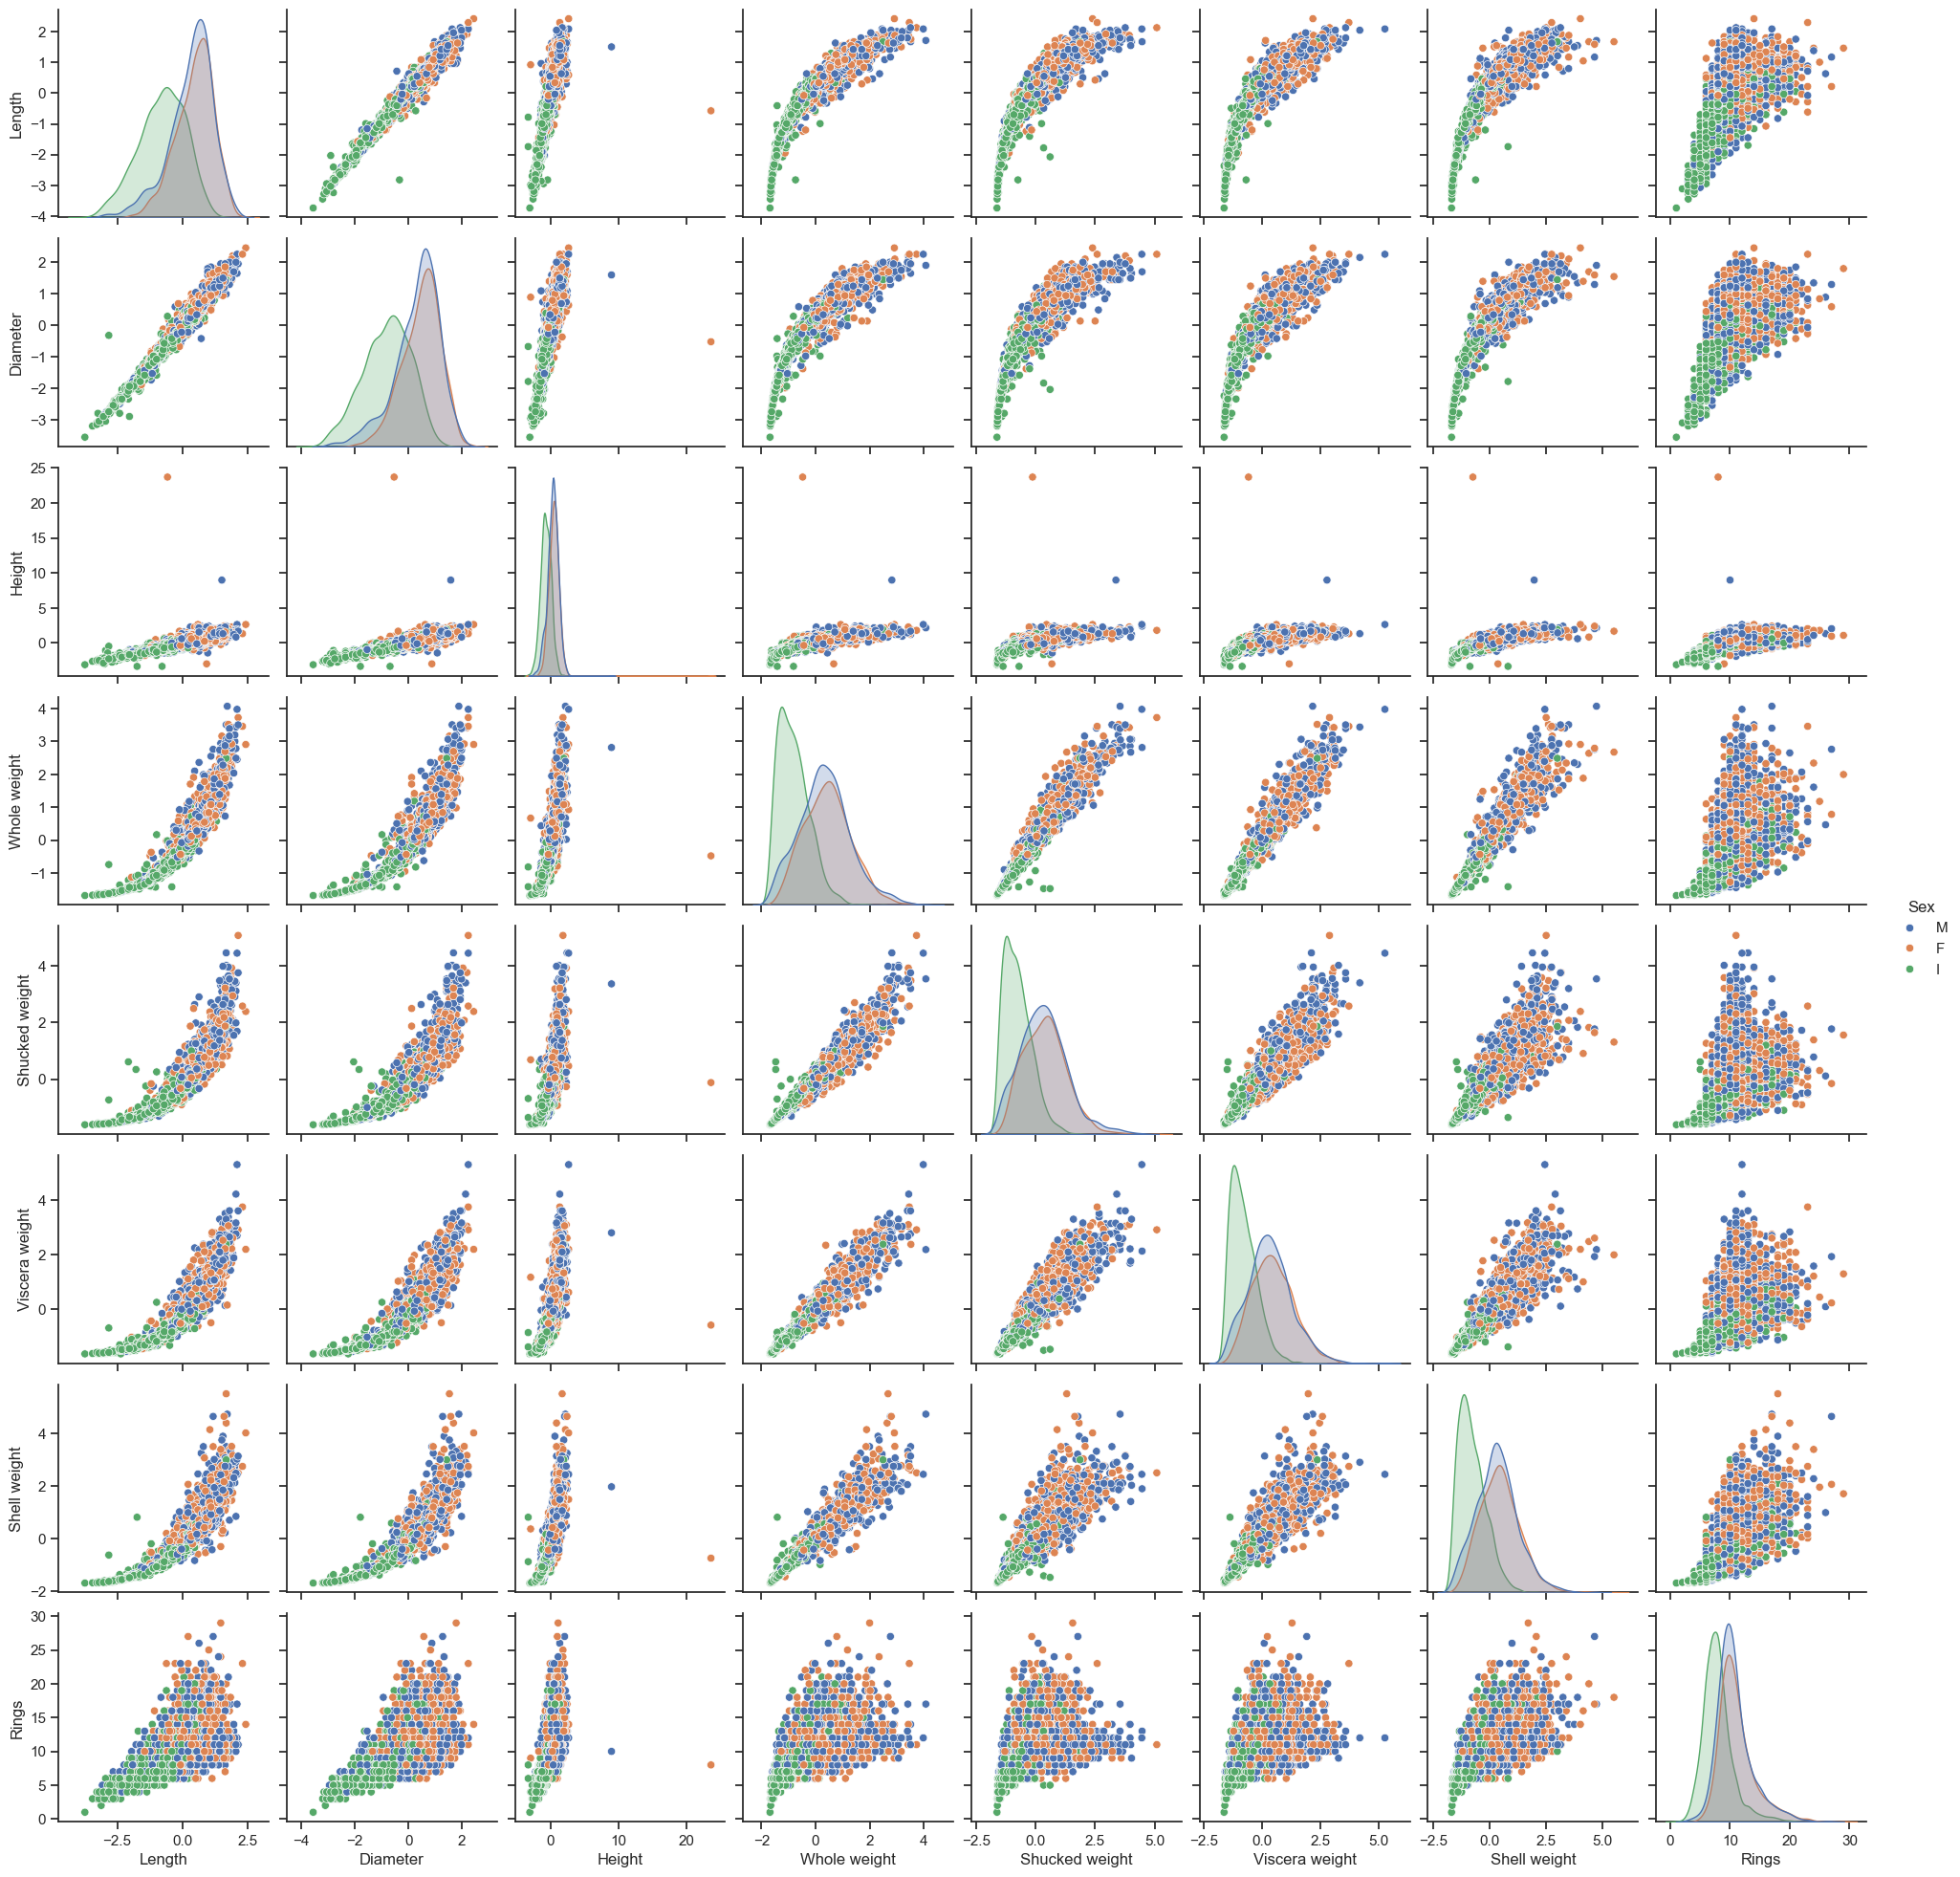

In [53]:
sns.pairplot(fishNorm[dc], hue=s, diag_kind='kde')

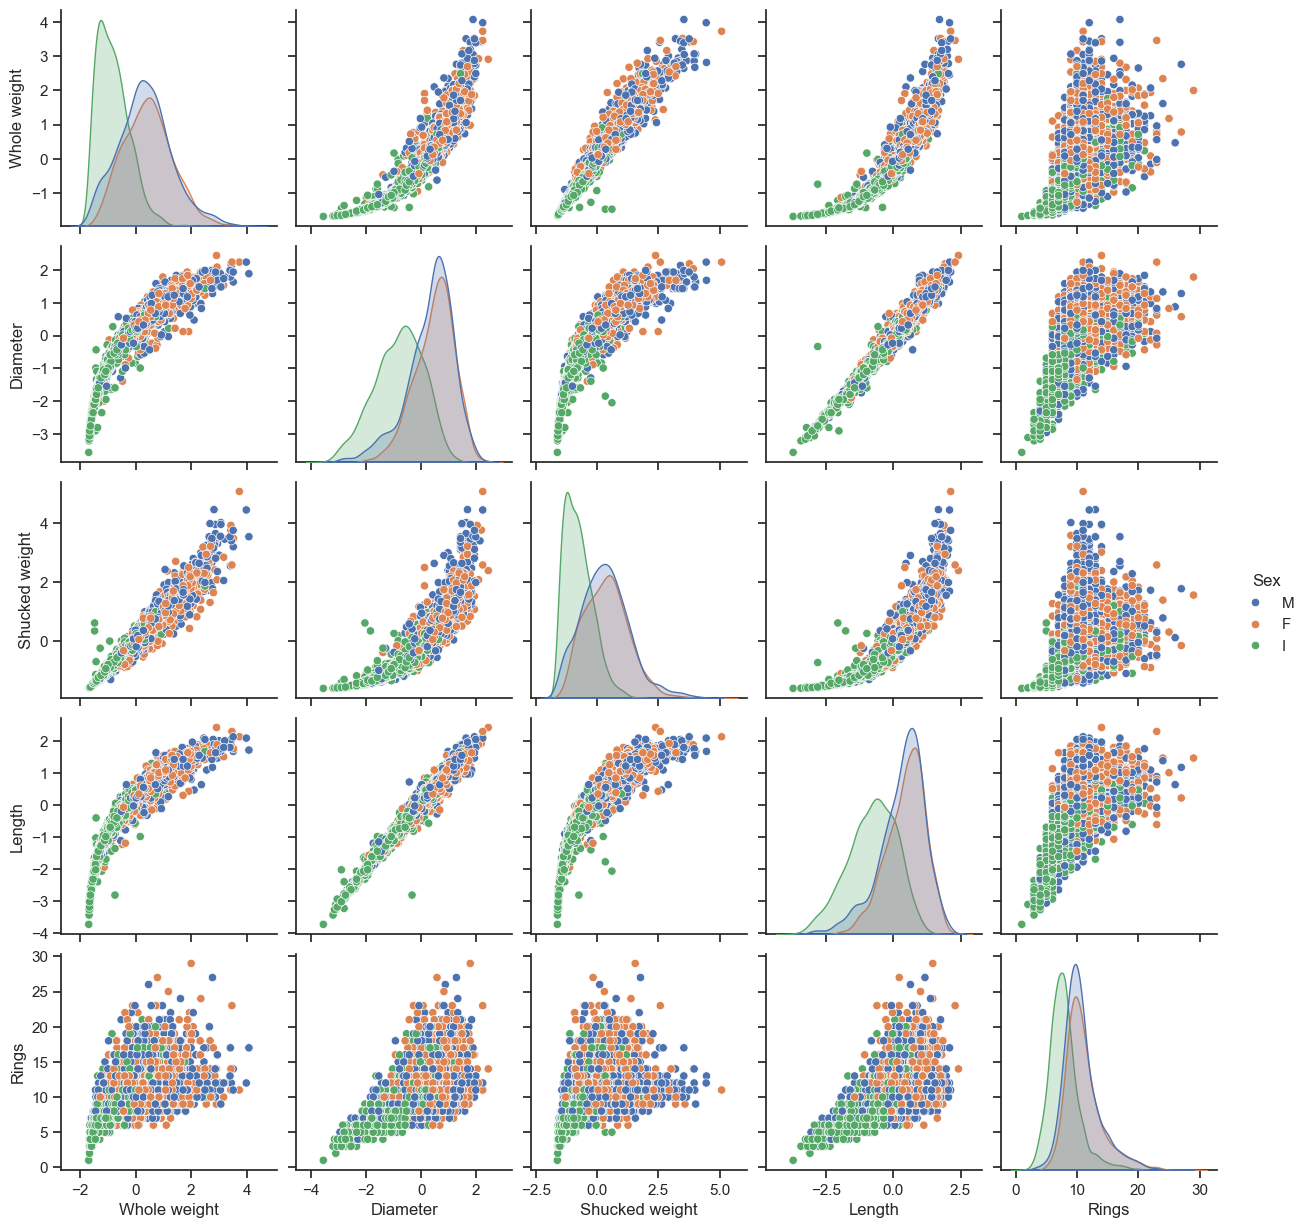

In [62]:
sns.pairplot(fishNorm[['Whole weight','Diameter','Shucked weight','Length','Rings','Sex']], hue=s, diag_kind='kde')

**The original grouping but I am wonder how the model would train if we instead grouped Male and Female into one**

In [63]:
fishM = fishNorm[fishNorm[s] == 'M']
fishF = fishNorm[fishNorm[s] == 'F']
fishI = fishNorm[fishNorm[s] == 'I']

display(fishM.shape)
display(fishF.shape)
display(fishI.shape)

(1528, 9)

(1307, 9)

(1342, 9)

In [64]:
fishNorm2 = fishNorm.copy()
fishNorm[s] = fishNorm[s].map({'M': 0, 'F': 1, 'I': 2})
fishNorm2[s] = fishNorm2[s].map({'M': 0, 'F': 0, 'I': 1})

**1.4**   
As we can see above, the data set has a similar number of entries for the three categories of fish(M,F,I). Through knowing this we could say that 

In [66]:
print(f'Labels: shape={fishNorm[c].shape}')
display(fishNorm[c].describe())
display(fishNorm[c].head())

Labels: shape=(4177,)


count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [67]:
# # classify color of fish with all features
# TODO C=Quality
X = fishNorm[ds].values  #data
y = np.ravel(fishNorm[c]) #labels (color)

X2 = fishNorm2[ds].values  #data
y2 = np.ravel(fishNorm2[c]) #labels (color)

print(f'Data: shape={X.shape}')
print(f'Labels: shape={y.shape}')

Data: shape=(4177, 8)
Labels: shape=(4177,)


In [145]:
# Create Train/Test Split
ran = 42
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=train_size, random_state = ran) 

***Part 2***


In [146]:
knn = neighbors.KNeighborsClassifier()
knn2 = neighbors.KNeighborsClassifier()

In [116]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [117]:
result = knn.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Results for the Knn with the original seperation of males and females within the data**

In [119]:
knn_accuracy = accuracy_score(y_test, result)
knn_precision = precision_score(y_test, result, average='weighted')
knn_recall = recall_score(y_test, result, average='weighted')
print("Accuracy: ",knn_accuracy)
print("Precision: ",knn_precision)
print("Recall: ",knn_recall)

Accuracy:  0.22488038277511962
Precision:  0.21614720612291385
Recall:  0.22488038277511962


c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**With the second approach where I grouped the Fale and Females together**

In [148]:
knn2.fit(X=X_train2, y=y_train2)

KNeighborsClassifier()

In [149]:
result = knn2.predict(X_test2)

In [151]:
knn_accuracy = accuracy_score(y_test, result)
knn_precision = precision_score(y_test, result, average='weighted')
knn_recall = recall_score(y_test, result, average='weighted')
print("Accuracy: ",knn_accuracy)
print("Precision: ",knn_precision)
print("Recall: ",knn_recall)

Accuracy:  0.25598086124401914
Precision:  0.24183552561042437
Recall:  0.25598086124401914


c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
from sklearn.model_selection import cross_val_score

In [ ]:
# store the scores
scores = []

for i in range(1, 500, 1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy") # uses 5 folds as default
    #print(score)
    scores.append(score.mean()) # take the average score of the 5 folds and add it to the list of scores

In [152]:
# store the scores
scores = []

for i in range(1, 200, 1):
    knn2 = neighbors.KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(estimator=knn2, X=X2, y=y2, scoring="accuracy") # uses 5 folds as default
    #print(score)
    scores.append(score.mean()) # take the average score of the 5 folds and add it to the list of scores

c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated clas

In [153]:
print(scores)

[np.float64(0.19560037819098647), np.float64(0.21355098415608972), np.float64(0.2011076411769762), np.float64(0.2137979543305733), np.float64(0.21954359224135458), np.float64(0.2240904793284245), np.float64(0.2307927685299258), np.float64(0.2358192705498095), np.float64(0.24300146119244764), np.float64(0.24276394579262525), np.float64(0.2444394464659198), np.float64(0.24755092685442515), np.float64(0.24731341145460278), np.float64(0.24683465604675817), np.float64(0.2458754261811306), np.float64(0.24515686330687908), np.float64(0.24731341145460278), np.float64(0.24683580208005043), np.float64(0.2492298656275965), np.float64(0.24635647365555968), np.float64(0.24516087442340204), np.float64(0.24922786006933503), np.float64(0.24851187576999112), np.float64(0.24611609317250666), np.float64(0.2525788614159241), np.float64(0.24635389508065209), np.float64(0.2511414491590981), np.float64(0.256169097212274), np.float64(0.2604770363579062), np.float64(0.2597570409420394), np.float64(0.2621522505

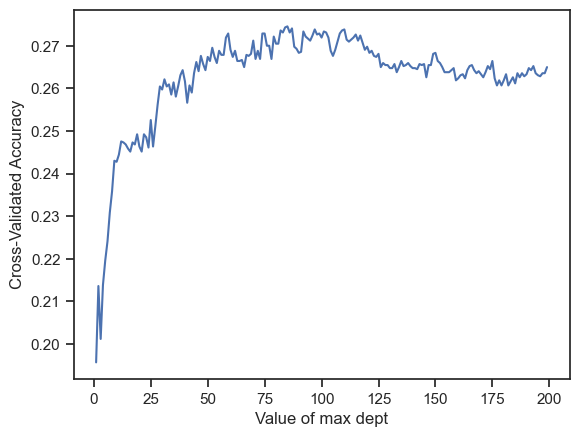

In [154]:
plt.plot(range(1,200), scores)
plt.xlabel('Value of max dept')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**Below are the values with the first approach and running k-manifolds algo to find the best k value**

In [155]:
knn = neighbors.KNeighborsClassifier(n_neighbors=100) # with 3 neighbors

knn.fit(X=X_train, y=y_train)
result = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, result)
knn_precision = precision_score(y_test, result, average='weighted')
knn_recall = recall_score(y_test, result, average='weighted')
print("Accuracy: ",knn_accuracy)
print("Precision: ",knn_precision)
print("Recall: ",knn_recall)

Accuracy:  0.30861244019138756
Precision:  0.2585643643340841
Recall:  0.30861244019138756


c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [168]:
knn = neighbors.KNeighborsClassifier(n_neighbors=170) # with 3 neighbors

knn.fit(X=X_train2, y=y_train2)
result = knn.predict(X_test2)

knn_accuracy = accuracy_score(y_test2, result)
knn_precision = precision_score(y_test2, result, average='weighted')
knn_recall = recall_score(y_test2, result, average='weighted')
print("Accuracy: ",knn_accuracy)
print("Precision: ",knn_precision)
print("Recall: ",knn_recall)

Accuracy:  0.30741626794258375
Precision:  0.25199182230097156
Recall:  0.30741626794258375


c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**They provide very similar results after finding the optimal k value**

**Part 3: Decision Tree Classifier**

In [169]:
from sklearn import tree 

In [170]:
# store the scores
scores = []
rnd = 42

for i in range(1, 100, 1):
    dt = tree.DecisionTreeClassifier(random_state=rnd, max_depth=i)
    score = cross_val_score(estimator=dt, X=X, y=y, scoring="accuracy") # uses 5 folds as default, can specify using cv=
    #print(score)
    scores.append(score.mean()) # take the average score of the 5 folds and add it to the list of scores

c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated clas

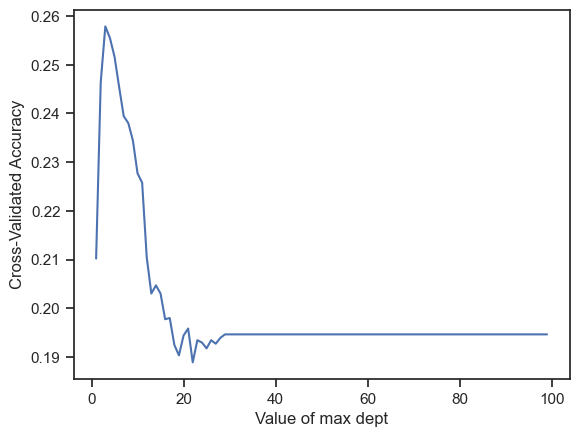

In [172]:
plt.plot(range(1,100), scores)
plt.xlabel('Value of max dept')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

The accuracy drops sharply and then plataus.

In [192]:

X =fish[dc].values  #data
y = np.ravel(fish[c]) #labels (color)

print(f'Data: shape={X.shape}')
print(f'Labels: shape={y.shape}')

ran = 42
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

Data: shape=(4177, 9)
Labels: shape=(4177,)


In [191]:
fish[s] = fish[s].map({'M': 0, 'F': 1, 'I': 2})

In [193]:
dt = tree.DecisionTreeClassifier(random_state=rnd, max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [195]:
y_pred = dt.predict(X=X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred ,average='weighted')
print("Accuracy: ",dt_accuracy)
print("Precision: ",dt_precision)
print("Recall: ",dt_recall)

Accuracy:  0.9593301435406698
Precision:  0.9528241335044929
Recall:  0.9593301435406698


c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [223]:
from sklearn.tree import export_text

In [224]:
export_text(dt, feature_names=dc)


'|--- Rings <= 9.50\n|   |--- Rings <= 8.50\n|   |   |--- Rings <= 7.50\n|   |   |   |--- Rings <= 6.50\n|   |   |   |   |--- Rings <= 5.50\n|   |   |   |   |   |--- Rings <= 4.50\n|   |   |   |   |   |   |--- Rings <= 3.50\n|   |   |   |   |   |   |   |--- Height <= 0.03\n|   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |--- Height >  0.03\n|   |   |   |   |   |   |   |   |--- class: 3\n|   |   |   |   |   |   |--- Rings >  3.50\n|   |   |   |   |   |   |   |--- class: 4\n|   |   |   |   |   |--- Rings >  4.50\n|   |   |   |   |   |   |--- class: 5\n|   |   |   |   |--- Rings >  5.50\n|   |   |   |   |   |--- class: 6\n|   |   |   |--- Rings >  6.50\n|   |   |   |   |--- class: 7\n|   |   |--- Rings >  7.50\n|   |   |   |--- class: 8\n|   |--- Rings >  8.50\n|   |   |--- class: 9\n|--- Rings >  9.50\n|   |--- Rings <= 10.50\n|   |   |--- class: 10\n|   |--- Rings >  10.50\n|   |   |--- Rings <= 11.50\n|   |   |   |--- class: 11\n|   |   |--- Rings >  11.50\n|

In [ ]:
# |--- Rings <= 9.50
# |   |--- Rings <= 8.50
# |   |   |--- Rings <= 7.50
# |   |   |   |--- Rings <= 6.50
# |   |   |   |   |--- Rings <= 5.50
# |   |   |   |   |   |--- Rings <= 4.50
# |   |   |   |   |   |   |--- Rings <= 3.50
# |   |   |   |   |   |   |   |--- Height <= 0.03
# |   |   |   |   |   |   |   |   |--- class: 1
# |   |   |   |   |   |   |   |--- Height >  0.03
# |   |   |   |   |   |   |   |   |--- class: 3
# |   |   |   |   |   |   |--- Rings >  3.50
# |   |   |   |   |   |   |   |--- class: 4
# |   |   |   |   |   |--- Rings >  4.50
# |   |   |   |   |   |   |--- class: 5
# |   |   |   |--- Rings >  5.50
# |   |   |   |   |--- class: 6
# |   |   |   |--- Rings >  6.50
# |   |   |   |   |--- class: 7
# |   |   |--- Rings >  7.50
# |   |   |   |--- class: 8
# |--- Rings >  8.50
# |   |   |--- class: 9
# |--- Rings >  9.50
# |   |--- Rings <= 10.50
# |   |   |--- class: 10
# |   |--- Rings >  10.50
# |   |   |--- Rings <= 11.50
# |   |   |   |--- class: 11
# |   |   |--- Rings >  11.50
# |   |   |   |--- Rings <= 12.50
# |   |   |   |   |--- class: 12
# |   |   |   |--- Rings >  12.50
# |   |   |   |   |--- Rings <= 13.50
# |   |   |   |   |   |--- class: 13
# |   |   |   |   |--- Rings >  13.50
# |   |   |   |   |   |--- Rings <= 14.50
# |   |   |   |   |   |   |--- class: 14
# |   |   |   |   |   |--- Rings >  14.50
# |   |   |   |   |   |   |--- Rings <= 15.50
# |   |   |   |   |   |   |   |--- class: 15
# |   |   |   |   |   |   |--- Rings >  15.50
# |   |   |   |   |   |   |   |--- Rings <= 16.50
# |   |   |   |   |   |   |   |   |--- class: 16
# |   |   |   |   |   |   |   |--- Rings >  16.50
# |   |   |   |   |   |   |   |   |--- class: 17

**Part 4**

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [226]:

X =fish[dc].values  #data
y = np.ravel(fish[c]) #labels (color)

print(f'Data: shape={X.shape}')
print(f'Labels: shape={y.shape}')

ran = 42
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

Data: shape=(4177, 9)
Labels: shape=(4177,)


In [229]:
rfc = RandomForestClassifier()
parameters = {"max_depth": range(2,100, 5), "n_estimators": range(2, 200, 10)}


gridSearch = GridSearchCV(rfc, param_grid=parameters, scoring="accuracy") # GridSearchCV by default uses 5-fold cross validation

In [230]:
gridSearch.fit(X=X, y=y)

c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 100, 5),
                         'n_estimators': range(2, 200, 10)},
             scoring='accuracy')

In [231]:
res = pd.DataFrame(gridSearch.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005004,0.001132,0.001028,0.000106,2,2,"{'max_depth': 2, 'n_estimators': 2}",0.199761,0.491627,0.473054,0.293413,0.475449,0.386661,0.118315,400
1,0.017194,0.000322,0.001420,0.000181,2,12,"{'max_depth': 2, 'n_estimators': 12}",0.503589,0.405502,0.498204,0.445509,0.577246,0.486010,0.058144,394
2,0.032654,0.003498,0.001644,0.000070,2,22,"{'max_depth': 2, 'n_estimators': 22}",0.523923,0.484450,0.497006,0.486228,0.469461,0.492214,0.018123,390
3,0.047787,0.002115,0.002092,0.000096,2,32,"{'max_depth': 2, 'n_estimators': 32}",0.458134,0.523923,0.535329,0.400000,0.548503,0.493178,0.056023,389
4,0.062768,0.001555,0.002775,0.000733,2,42,"{'max_depth': 2, 'n_estimators': 42}",0.500000,0.443780,0.449102,0.417964,0.534132,0.468996,0.042047,399


In [232]:
res["max_depth"] = res["params"].apply(lambda x: x["max_depth"])
res["n_estimators"] = res["params"].apply(lambda x: x["n_estimators"])

res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,max_depth,n_estimators
0,0.005004,0.001132,0.001028,0.000106,2,2,"{'max_depth': 2, 'n_estimators': 2}",0.199761,0.491627,0.473054,0.293413,0.475449,0.386661,0.118315,400,2,2
1,0.017194,0.000322,0.001420,0.000181,2,12,"{'max_depth': 2, 'n_estimators': 12}",0.503589,0.405502,0.498204,0.445509,0.577246,0.486010,0.058144,394,2,12
2,0.032654,0.003498,0.001644,0.000070,2,22,"{'max_depth': 2, 'n_estimators': 22}",0.523923,0.484450,0.497006,0.486228,0.469461,0.492214,0.018123,390,2,22
3,0.047787,0.002115,0.002092,0.000096,2,32,"{'max_depth': 2, 'n_estimators': 32}",0.458134,0.523923,0.535329,0.400000,0.548503,0.493178,0.056023,389,2,32
4,0.062768,0.001555,0.002775,0.000733,2,42,"{'max_depth': 2, 'n_estimators': 42}",0.500000,0.443780,0.449102,0.417964,0.534132,0.468996,0.042047,399,2,42


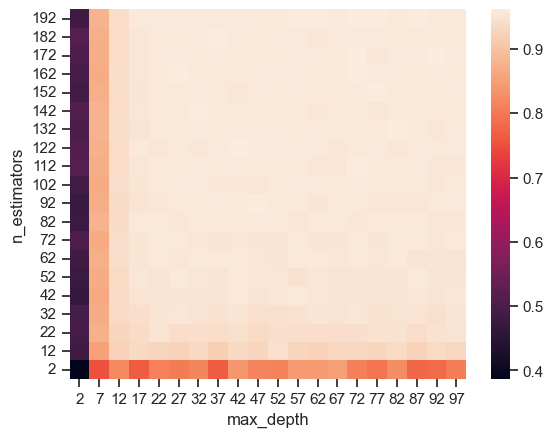

In [233]:
sns.heatmap(res.pivot(columns="max_depth", index="n_estimators", values="mean_test_score")).invert_yaxis()

In [234]:
ave_mean_score_for_depth = []
for i in range(2,100, 5):
    ave = res.loc[res['max_depth'] == i]["mean_test_score"].mean()
    ave_mean_score_for_depth.append(ave)

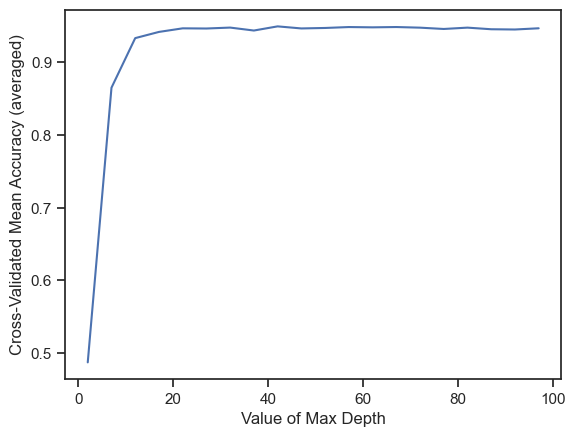

In [235]:
plt.plot(range(2,100, 5), ave_mean_score_for_depth)
plt.xlabel('Value of Max Depth')
plt.ylabel('Cross-Validated Mean Accuracy (averaged)')
plt.show()

In [241]:
ave_mean_score_for_estimators = []
for i in range(2, 200, 10):
    ave = res.loc[res['n_estimators'] == i]["mean_test_score"].mean()
    ave_mean_score_for_estimators.append(ave)

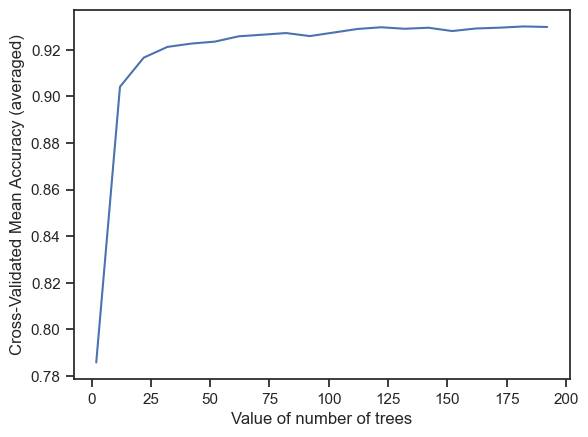

In [242]:
plt.plot(range(2, 200, 10), ave_mean_score_for_estimators)
plt.xlabel('Value of number of trees')
plt.ylabel('Cross-Validated Mean Accuracy (averaged)')
plt.show()

In [243]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=125)

rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(max_depth=20, n_estimators=125)

In [244]:
y_pred = rfc.predict(X=X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy: ",rfc_accuracy)
print("Precision: ",rfc_precision)
print("Recall: ",rfc_recall)

Accuracy:  0.9581339712918661
Precision:  0.948675907341969
Recall:  0.9581339712918661


c:\Users\rifat\OneDrive\Desktop\ECE657A\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5 Final Results


| Model | Settings | Abalone Model Accuracy |
| --- | --- | --- |
| kNN | k=100 | .225 |
| kNN | k=3, weight="averaged" | .309 |
| Decision Tree | max_depth=8 | .959 |
| Random Forest | max_depth=20, n_estimators= | .958 |